# Comparação da taxa de retorno de ações e fundos imobiliários.

- __Autora__: Beatriz Nascimento
- __Data de início__: 05 de setembro de 2020.
- __Última modificação__: 07 de setembro de 2020.
- __Data de conclusão__:
- __Descrição__:
    - Comparação entre uma lista de 3 ativos - ITAÚSA, TAESA e Usiminas - e uma lista de 3 fundos imobiliários - BPFF11, HGLG11 e BRCR11.
    - A comparação deu-se apenas em volta da taxa de retorno.
    - Período de comparação: 01 de janeiro de 2018 e 04 de setembro de 2020.
    - A fonte de dados foi o Yahoo Finances.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as web

In [24]:
acoes = ["ITSA4.SA", "TAEE3.SA", "USIM5.SA"]
fiis = ["BPFF11.SA", "HGLG11.SA", "BRCR11.SA"]

mydata_acoes = pd.DataFrame()
mydata_fiis = pd.DataFrame()

for i in acoes:
    mydata_acoes[i] = web.DataReader(i, data_source="yahoo", start="2018-1-1")["Adj Close"]
for j in fiis:
    mydata_fiis[j] = web.DataReader(j, data_source="yahoo", start="2018-1-1")["Adj Close"]

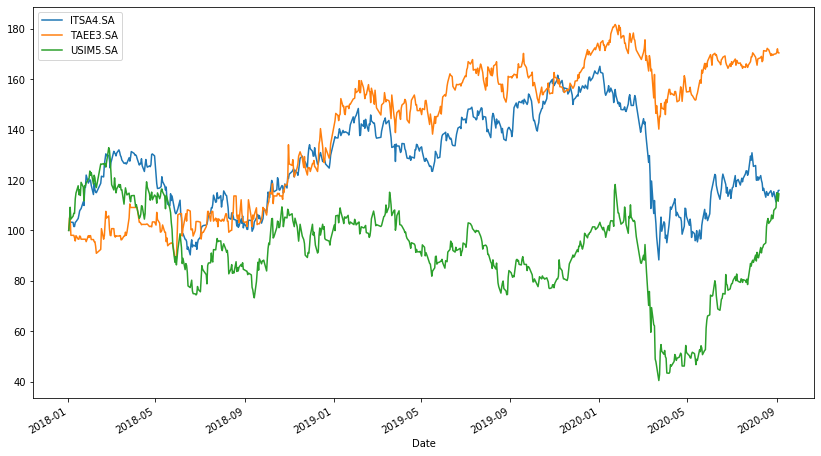

In [14]:
# normalizacao de dados da ações
(mydata_acoes / mydata_acoes.iloc[0] * 100).plot(figsize=(14,8))

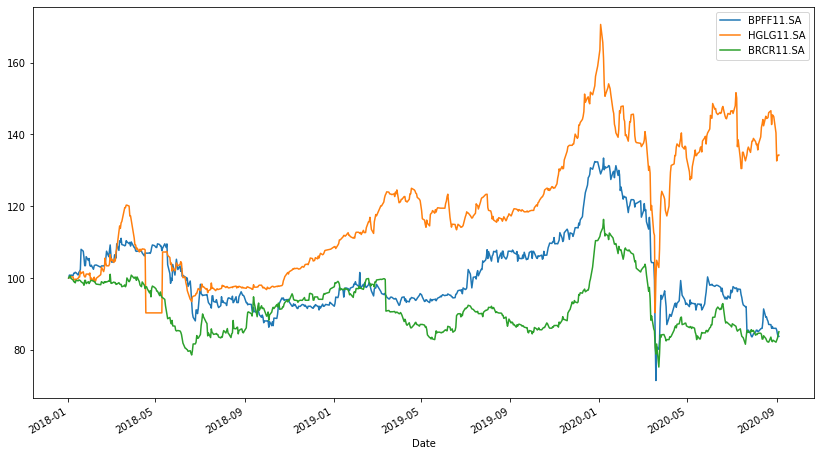

In [25]:
(mydata_fiis / mydata_fiis.iloc[0] * 100).plot(figsize=(14,8))

In [35]:
# retorno diario
retorno_acoes = (mydata_acoes/mydata_acoes.shift(1)) - 1
retorno_fiis = (mydata_fiis/mydata_fiis.shift(1)) - 1

In [37]:
print("Ações \n\n", retorno_acoes)
print("\n\nFIIs\n\n", retorno_fiis)

Ações 

             ITSA4.SA  TAEE3.SA  USIM5.SA
Date                                    
2018-01-02       NaN       NaN       NaN
2018-01-03  0.011788  0.048951  0.033334
2018-01-04  0.018816  0.000000  0.056451
2018-01-05  0.001751 -0.065333 -0.042939
2018-01-08 -0.000869  0.000000  0.010967
...              ...       ...       ...
2020-08-31 -0.035787  0.001059  0.009950
2020-09-01  0.032944  0.003175  0.050246
2020-09-02 -0.013374  0.008439  0.003752
2020-09-03  0.020855 -0.009414 -0.028972
2020-09-04  0.001021  0.000000  0.025986

[662 rows x 3 columns]


FIIs

             BPFF11.SA  HGLG11.SA  BRCR11.SA
Date                                       
2018-01-02        NaN        NaN        NaN
2018-01-03   0.008188   0.002292   0.002814
2018-01-04  -0.003553   0.000762   0.003274
2018-01-05   0.003566   0.000008  -0.006993
2018-01-08  -0.001421   0.000000  -0.004695
...               ...        ...        ...
2020-08-31   0.000000  -0.030884  -0.005141
2020-09-01  -0.005952  -0.055

In [38]:
# taxa de retorno médio anual
retorno_acoes_anual = retorno_acoes.mean() * 250
retorno_fiis_anual = retorno_fiis.mean() * 250

In [39]:
print("Ações \n\n", retorno_acoes_anual)
print("\n\nFIIs\n\n", retorno_fiis_anual)

Ações 

 ITSA4.SA    0.117458
TAEE3.SA    0.267549
USIM5.SA    0.213499
dtype: float64


FIIs

 BPFF11.SA   -0.029343
HGLG11.SA    0.155029
BRCR11.SA   -0.042523
dtype: float64


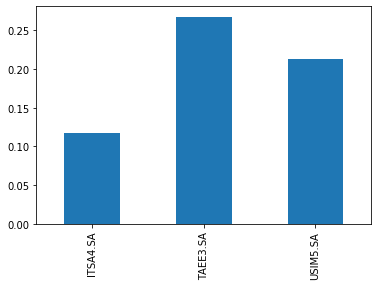

In [40]:
retorno_acoes_anual.plot.bar()

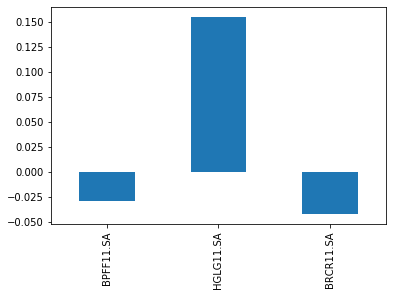

In [41]:
retorno_fiis_anual.plot.bar()

# Correlação entre o ativo ITSA4.SA e BPFF11.SA (são do mesmo segmento).

## Utilizaremos a correlação de Pearson.
## Ok, mas o que é?

## Matematicamente:

$$ \rho = \frac { \Sigma {(x_{i} - x') (y_{i} - y')}} { \sqrt { \Sigma {(x_{i} - x')^{2} } ) ( \Sigma (y_{i} - y')^{2} } } $$

Em palavras, a correlação de Pearon mede a **associação linear** entre **variáveis contínuas**. É o valor que indica o quanto a relação entre as variáveis pode ser descrita por uma reta.

#### Interpretando o valor de $ \rho $

- 0.9 a 1 $ \rightarrow $ positivo ou negativo indica uma correlação muito forte.
- 0.7 a 0.9 $ \rightarrow $ positivo ou negativo indica uma correlação forte.
- 0.5 a 0.7 $ \rightarrow $ positivo ou negativo indica uma correlação moderada.
- 0.3 a 0.5 $ \rightarrow $ positivo ou negativo indica uma correlação fraca.
- 0.0 a 0.3 $ \rightarrow $ positivo ou negativo indica uma correlação desprezível


Fonte: https://medium.com/brdata/correla%C3%A7%C3%A3o-direto-ao-ponto-9ec1d48735fb

In [51]:
retorno_acoes_anual["ITSA4.SA"].astype('float64').corr(retorno_fiis_anual["BPFF11.SA"].astype('float64'))

AttributeError: 'numpy.float64' object has no attribute 'corr'

### Taxa de retorno simples percentual.

$$ \alpha = \frac {P_{f} - P_{i}} {P_{i}} . 100 $$